In [1]:
%matplotlib inline

**Introduction

28,709 training images, 3,589 validation images and 3,589
test images with seven expression labels (anger, disgust, fear,
happiness, sadness, surprise and neutral)

In [27]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

file_path = "../data/fer2013/fer2013.csv"
submmit_file_path = "../data/fer2013/example_submission.csv"

In [3]:
file_data = pd.read_csv(file_path)
print(len(file_data))
np_file_data = np.array(file_data)
print(np_file_data)

35887
[[0
  '70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 

In [16]:
print(len(np_file_data[0][1].split(" "))) # 48*48图片

2304


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


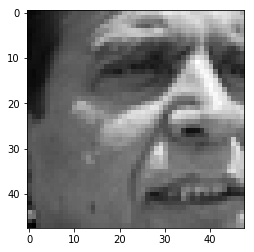

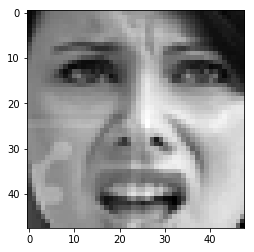

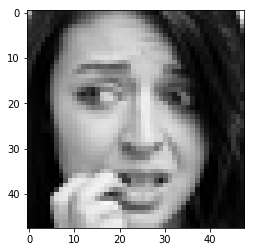

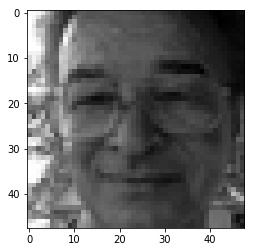

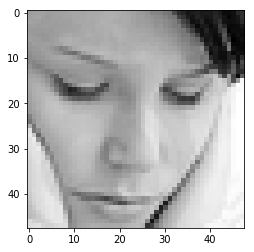

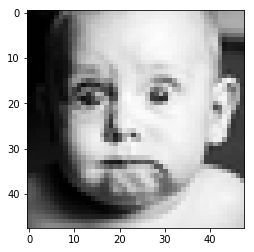

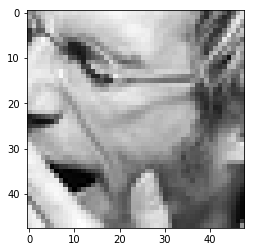

In [46]:
img_index_to_show = 5
for i in range(7):
    img_cur_index_to_show = 0
    for line in np_file_data:
        if line[0] == i:
            img_cur_index_to_show += 1
            if img_cur_index_to_show == img_index_to_show:
                data = line[1].split(" ")
                break
    img_data = np.array(data, dtype=float)
    img_data = np.reshape(img_data, (48,48))
    img = Image.fromarray(np.reshape(np.array(data, dtype=float), (48, 48)))
    print(img.size)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(img_data, cmap="gray")

In [32]:
print("文档数据集数据个数：", len(np_file_data))
col1 = np_file_data[:, 0]
s = set(col1)
print("文档数据集表情类别：", s)
num_list = [0, 0, 0, 0, 0, 0, 0]
for i in col1:
    num_list[i] += 1
print("文档数据集各表情类别的数据个数：", num_list)

col2 = np_file_data[:, 2]
s2 = set(col2)
print("文档数据集数据用途类别：", s2)
classes = ['Training', 'PrivateTest', 'PublicTest']
num_list = [0, 0, 0]
for i in col2:
    num_list[classes.index(i)] += 1
print("文档数据集数据各用途类别的数据个数：", num_list)

num_list = [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
for line in np_file_data:
    num_list[classes.index(line[2])][line[0]] += 1
print("文档数据集数据各用途类别的各表情类别的数据个数：", num_list)

文档数据集数据个数： 35887
文档数据集表情类别： {0, 1, 2, 3, 4, 5, 6}
文档数据集各表情类别的数据个数： [4953, 547, 5121, 8989, 6077, 4002, 6198]
文档数据集数据用途类别： {'Training', 'PrivateTest', 'PublicTest'}
文档数据集数据各用途类别的数据个数： [28709, 3589, 3589]
文档数据集数据各用途类别的各表情类别的数据个数： [[3995, 436, 4097, 7215, 4830, 3171, 4965], [491, 55, 528, 879, 594, 416, 626], [467, 56, 496, 895, 653, 415, 607]]


In [28]:
file_data = pd.read_csv(submmit_file_path)
print(len(file_data))

3588


SyntaxError: invalid syntax (<ipython-input-49-ed179716c7d1>, line 1)

以下部分是测试调用FER2013封装函数的结果
----

In [1]:
import sys
import torch
sys.path.insert(0, "..")
from dal.FER2013_DataSet import FER2013
import transforms.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
target_type = 'ls'
input_img_size = 223
# transform_train = transforms.Compose([
#     transforms.Normalize(0.5, 1),
#     transforms.Resize(input_img_size),  # 缩放将图片的最小边缩放为 input_img_size，因此如果输入是费正方形的，那么输出也不是正方形的
#     transforms.RandomCrop(input_img_size),  # 用于将非正方形的图片进行处理
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
# ])
IMG_MEAN = [0.5]
IMG_STD = [0.225]
transform_train = transforms.Compose([
    transforms.Resize(input_img_size),  # 缩放将图片的最小边缩放为 input_img_size，因此如果输入是非正方形的，那么输出也不是正方形的
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(IMG_MEAN, IMG_STD),
])
train_data = FER2013(is_train=True, img_dir_pre_path="../data/fer2013", transform=transform_train, target_type=target_type)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)
itr = enumerate(train_loader)

In [ ]:
bs, (inputs, targets, boxes, landmarks) = next(itr)
inputs, targets, landmarks = inputs.numpy(), targets.numpy(), landmarks.numpy()
# print(bs)
# print(inputs)
# print(targets)
# print(boxes)
# print(landmarks)
for index in range(len(inputs)):
    input = inputs[index]
    landmark = landmarks[index]
    print(input.shape)
    arr = input.reshape([input.shape[1], input.shape[2]])
    print(landmark.shape)
    landmark_arr = landmark.reshape([landmark.shape[1], landmark.shape[2]])
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(arr, cmap="gray")
    ax = fig.add_subplot(122)
    ax.imshow(landmark_arr, cmap="gray")
    plt.show()